<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/Digit_Recognizer_using_CNN_Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Introduction
2.   Data Preparation
3.   Model
4.   Evaluation



1. Introduction

Importing useful packages

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils.np_utils import to_categorical

In [7]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./train.csv
./test.csv
./.config/active_config
./.config/.last_update_check.json
./.config/.last_survey_prompt.yaml
./.config/config_sentinel
./.config/gce
./.config/.metricsUUID
./.config/logs/2020.01.13/16.37.40.784290.log
./.config/logs/2020.01.13/16.37.53.587497.log
./.config/logs/2020.01.13/16.37.37.002045.log
./.config/logs/2020.01.13/16.37.24.945113.log
./.config/logs/2020.01.13/16.37.53.933238.log
./.config/logs/2020.01.13/16.37.08.645258.log
./.config/configurations/config_default
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/california_housing_train.csv
./sample_data/mnist_train_small.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_test.csv


In [8]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print('train data : ', train.shape)
print('test data : ', test.shape)

train data :  (42000, 785)
test data :  (28000, 784)


In [9]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
train.label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [12]:
train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

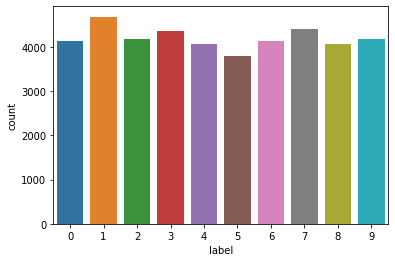

In [13]:
sns.countplot(train.label)

2. Data Preparation

In [0]:
X_train = train.iloc[:, 1:]
Y_train = train.label

In [0]:
X_train = X_train / 255 # normalize

In [0]:
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [17]:
X_train.shape

(42000, 28, 28, 1)

In [0]:
Y_train = to_categorical(Y_train)

In [40]:
Y_train.shape

(42000, 10)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [42]:
x_train.shape

(37800, 28, 28, 1)

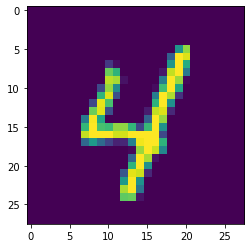

In [43]:
plt.imshow(x_train[30000][:, :,0])

3. Modeling

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)       

In [0]:
optimzr = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [0]:
model.compile(optimizer=optimzr, loss=['categorical_crossentropy'], metrics=['accuracy'])

In [48]:
x_train.shape

(37800, 28, 28, 1)

In [49]:
y_train.shape

(37800, 10)

In [50]:
model.fit(x_train,y_train,batch_size=20,epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
37800/37800 [==============================] - 628s 17ms/step - loss: 0.2414 - acc: 0.9312
Epoch 2/5
37800/37800 [==============================] - 624s 17ms/step - loss: 0.1013 - acc: 0.9728
Epoch 3/5
37800/37800 [==============================] - 626s 17ms/step - loss: 0.0768 - acc: 0.9793
Epoch 4/5
37800/37800 [==============================] - 625s 17ms/step - loss: 0.0643 - acc: 0.9834
Epoch 5/5
37800/37800 [==============================] - 624s 17ms/step - loss: 0.0572 - acc: 0.9848


4. Evaluation

In [52]:
# On train set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print('accuracy : ', accuracy_score(y_test, y_pred))
print('confusion_matrix : ', pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(0, 10), columns=range(0, 10)))
print('classification_report : ', classification_report(y_test, y_pred))

accuracy :  0.9885714285714285
confusion_matrix :       0    1    2    3    4    5    6    7    8    9
0  405    0    1    0    0    1    1    0    0    0
1    0  465    2    0    0    0    1    3    0    0
2    0    0  418    0    1    0    0    0    1    0
3    0    0    0  496    0   10    0    0    0    0
4    0    0    0    0  392    0    1    0    1    3
5    0    0    0    0    0  332    6    0    1    0
6    1    0    0    0    0    0  401    0    0    0
7    0    0    5    0    1    0    0  432    0    0
8    1    0    0    1    0    1    1    1  398    0
9    0    0    0    0    0    1    0    1    1  413
classification_report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       408
           1       1.00      0.99      0.99       471
           2       0.98      1.00      0.99       420
           3       1.00      0.98      0.99       506
           4       0.99      0.99      0.99       397
           5       0.96    

In [53]:
# On test set
test = test / 255 # normalize
test = test.values.reshape(-1, 28, 28, 1)
print('test shape : ', test.shape)

y_predict = model.predict(test)
print(y_predict)
y_predict = np.argmax(y_predict, axis=1)
print(y_predict)

test shape :  (28000, 28, 28, 1)
[[2.24467444e-13 3.59789984e-14 1.00000000e+00 ... 3.81595762e-11
  2.39835631e-13 9.45561090e-16]
 [1.00000000e+00 4.57306481e-15 2.64315347e-09 ... 2.54981192e-12
  1.47163604e-09 1.06692735e-08]
 [7.25144602e-08 1.36030964e-08 1.97233874e-08 ... 1.48426925e-05
  2.94271103e-06 9.99977112e-01]
 ...
 [5.96946800e-18 5.52412673e-12 2.42787290e-13 ... 5.90204968e-14
  4.12745046e-11 4.77951588e-14]
 [1.40424248e-07 1.81540941e-07 1.74920359e-07 ... 5.51791280e-04
  3.54073268e-06 9.99423265e-01]
 [3.35757030e-12 1.64594011e-12 1.00000000e+00 ... 3.33911676e-10
  5.13025282e-11 8.07176252e-14]]
[2 0 9 ... 3 9 2]


In [54]:
y_predict.shape

(28000,)

In [0]:
my_submission = pd.read_csv('./sample_submission.csv')

In [57]:
my_submission.head(2)

,ImageId,Label
0,1,0
1,2,0


In [0]:
my_submission['Label'] = y_predict

In [0]:
my_submission.to_csv('my_labels.csv', index=False)